In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
df=pd.read_csv("car_dataset.csv")
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [171]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


preparing the data for linear regression model

In [5]:
#Creating new dataframe using the existing one
new_df=df[['enginesize','price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


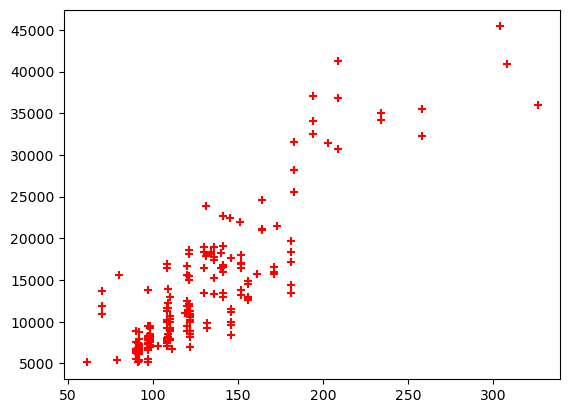

In [176]:
#checking the distribution on the data using the scatterplot
plt.xlabel='enginesize'
plt.ylabel='price'
plt.scatter(x=new_df['enginesize'],y=new_df['price'],marker='+',color='red')
plt.show()

In [178]:
#assigning x and y
x=new_df['enginesize']
y=new_df['price']

In [180]:
#Splitting the data as train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [182]:
#Checking for the shape of the train and  the test data# noting that the size of the trsin shoud be the same 
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (164,)
x_test:  (41,)
y_train:  (164,)
y_test:  (41,)


In [184]:
#Creating the linear regression model
model= LinearRegression()

In [203]:
#Training the model using the train data
#For a single independent variable we use the formart'values.reshape(-1,1)'

model.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [205]:
#Show the coefficient
model.coef_

array([164.31545172])

In [207]:
#Showing the intercept
model.intercept_

-7613.370939489803

In [209]:
#Making some predicted values of y
y_pred=model.predict(x_test.values.reshape(-1,1))

#Calculating the Metrics


In [212]:
#Mean Sqrd Error
mse=mean_squared_error(y_test,y_pred)
print('MSE--> ',mse)

MSE-->  16835544.03813768


In [214]:
#Root Mean Squared Error
import math
rmse=math.sqrt(mse)
print('RMSE-->',rmse)

RMSE--> 4103.113944084137


In [216]:
#Mean Absolute Error
mae=mean_absolute_error(y_test,y_pred)
print('MAE-->',mae)

MAE--> 3195.0312395000433


In [218]:
r2=r2_score(y_test,y_pred)
print("R2-->",r2)

R2--> 0.7825324721447274


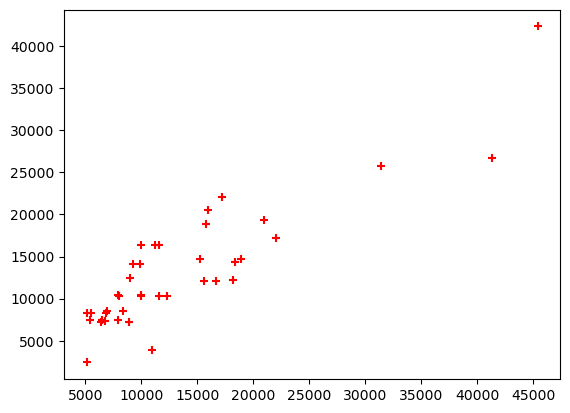

In [220]:
#plotting the actual and the predicted valulues
plt.xlabel='Actual'
plt.ylabel='Predicted'
plt.scatter(y_test,y_pred,color='red',marker='+')
plt.show()

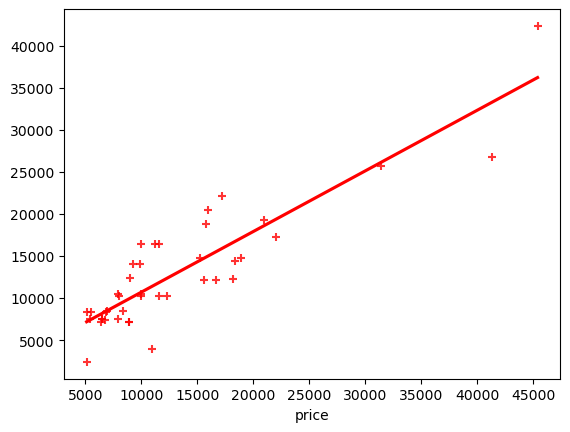

In [222]:
#plotting the regression model line
sns.regplot(x=y_test, y=y_pred,ci=None,color='red',marker='+')
plt.show()

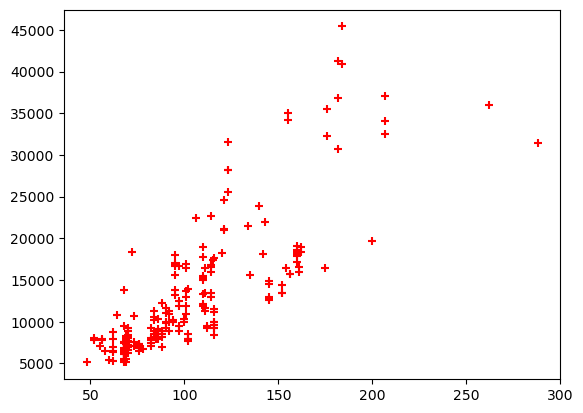

In [224]:
#Using the other independent variables
#Plot horsepower-price prediction
plt.scatter(df['horsepower'],df['price'],color='red',marker='+')
plt.show()

In [226]:
#New x will be the horsepowe and the enginesize
x=df[['enginesize','horsepower']]
x

,enginesize,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115
...,...,...
200,141,114
201,141,160
202,173,134
203,145,106


In [228]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [230]:
#Splitting the data as train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [232]:
#Checking for the shape of the train and  the test data# noting that the size of the trsin shoud be the same 
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (164, 2)
x_test:  (41, 2)
y_train:  (164,)
y_test:  (41,)


In [257]:
#Creating the linear regression model
model= LinearRegression()

In [259]:
#Training the model using the train data

model.fit(x_train,y_train)

LinearRegression()

In [261]:
#Show the coefficient
model.coef_

array([115.9909421,  64.2026329])

In [263]:
#Showing the intercept
model.intercept_

-8148.677422999768

In [265]:
#Making some predicted values of y
y_pred=model.predict(x_test)

#Calculating the Evaluation Metrics


In [268]:
mse2=mean_squared_error(y_test,y_pred)
print('MSE--> ',mse)
rmse2=math.sqrt(mse)
print('RMSE-->',rmse)
mae2=mean_absolute_error(y_test,y_pred)
print('MAE-->',mae)
r2_2=r2_score(y_test,y_pred)
print("R2-->",r2)

MSE-->  16835544.03813768
RMSE--> 4103.113944084137
MAE--> 3195.0312395000433
R2--> 0.7825324721447274


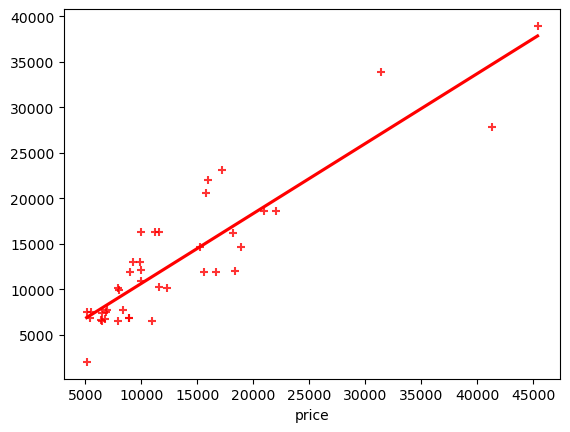

In [270]:
#plotting the regression model line
sns.regplot(x=y_test, y=y_pred,ci=None,color='red',marker='+')
plt.show()

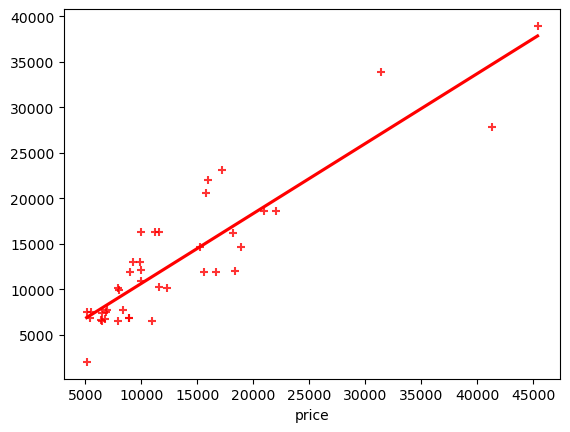

In [272]:
#plotting the regression model line
sns.regplot(x=y_test, y=y_pred,ci=None,color='red',marker='+')
plt.show()

In [273]:
#Comparing the two metrics
metrics={'Model':['First','Second'],
         'MSE':[mse,mse2],
         'RMSE':[rmse,rmse2],
         'MAE':[mae,mae2],
         'R2':[r2,r2_2]
        }
metrics=pd.DataFrame(data=metrics)
metrics

,Model,MSE,RMSE,MAE,R2
0,First,1.683554e+07,4103.113944,3195.031240,0.782532
1,Second,1.551480e+07,4103.113944,3061.617263,0.799593


In [290]:
#Testing some new unseen data forecasting
x_new = np.array([[140, 120]])
predictions=model.predict(x_new)
predictions


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15794.37041909])